In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
sns.set_style("white")

In [3]:
# Load it up
filename = "/Users/Alex/Dropbox/Science/Side Projects/Blood Testing/data.pandas"
sdf = pd.read_pickle(filename)

# Select only good vials
sdf = sdf[sdf.good == True]

# Fill in the micro/hypo calls based on these criteria (AND THEN MOVE TO THE EXTRACTION NOTEBOOK)
# ALL THESE INDICES ARE TO CALL THE MICRO/HYPOCHROMIC ANEMIC POPULATION
hypo_idx = sdf['%Hypo'] >= 3.9
anemic_woman_idx = (sdf['Age'] > 15) & (sdf['Sex'] == "F") & (sdf.HGB < 12.0) & hypo_idx
anemic_man_idx = (sdf['Age'] > 15) & (sdf['Sex'] == "M") & (sdf.HGB < 13.0) & hypo_idx
anemic_infant_idx = (sdf['Age'] < 5) & (sdf.HGB < 11.0) & hypo_idx
anemic_child_idx = (sdf['Age'] >= 5) & (sdf['Age'] < 15) & (sdf.HGB < 11.5) & hypo_idx
anemic_population_idx = anemic_woman_idx | anemic_man_idx | anemic_infant_idx | anemic_child_idx
sdf.blood_type.values[np.argwhere(anemic_population_idx)[()]] = 'anemic'
sdf.blood_type.values[np.argwhere(anemic_population_idx == False)[()]] = 'normal'

In [4]:
# For each IDA, for each centrifugation time, show normal/anemic data curves with error

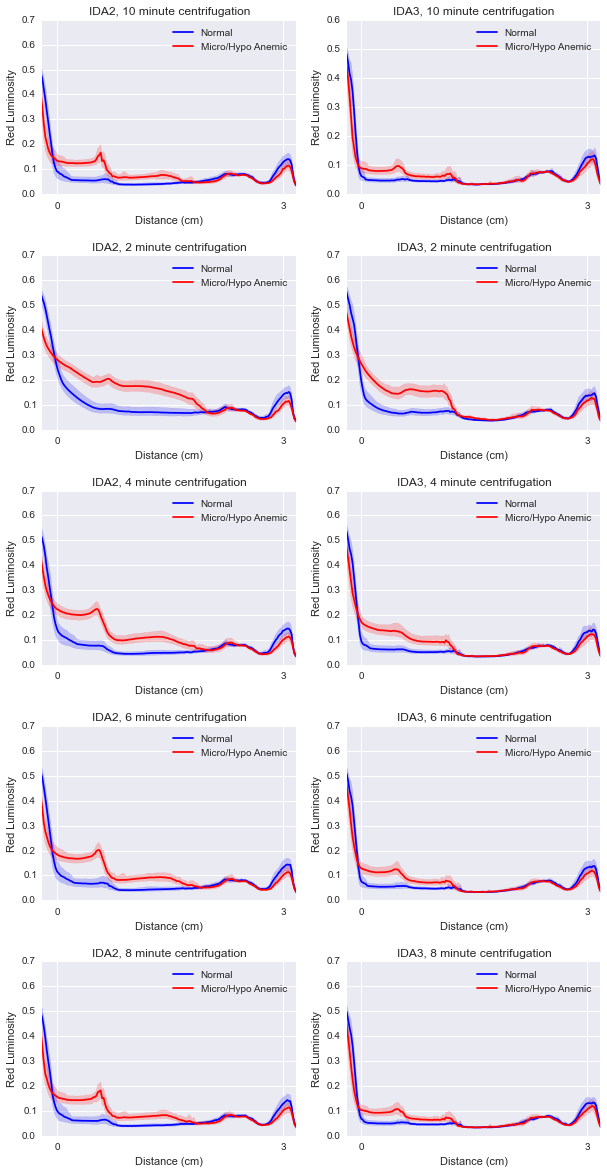

In [5]:
run_times = sdf.run_time.unique()
idas = sdf.ida.unique()

figure(figsize=(10,20))
gs = GridSpec(len(run_times), len(idas), hspace=0.35)

for i,(run_time,ida) in enumerate(itertools.product(run_times, idas)):
    subplot(gs[i])
    isdf = sdf[(sdf.run_time == run_time) & (sdf.ida == ida)]
    data_normal, data_anemic = [np.vstack(isdf[isdf.blood_type == blood_type].data.values)  
                                                     for blood_type in ("normal","anemic")]
    sns.tsplot(data_normal, err_style='ci_band', ci=100, color='b', condition=True)
    sns.tsplot(data_anemic, err_style='ci_band', ci=100, color='r', condition=True)
    title("%s, %d minute centrifugation" % (ida, run_time))
    ylabel("Red Luminosity")
    legend(["Normal", "Micro/Hypo Anemic"])
    xlim(10,xlim()[-1])
    xticks([20,175], ["0", "3"])
    xlabel("Distance (cm)")

In [6]:
[c for c in isdf.columns]

[u'%Hyper',
 u'%Hypo',
 u'%Macro',
 u'%Micro',
 u'%Micro/%Hypo Ratio',
 u'Age',
 u'Age Units',
 u'CH',
 u'CHCM',
 u'HCT',
 u'HDW',
 u'HGB',
 u'MCH',
 u'MCHC',
 u'MCV',
 u'MPV',
 u'PLT',
 u'RBC',
 u'RDW',
 u'Sex',
 u'WCB',
 u'blood_type',
 'data',
 'excel_file',
 'experiment_index',
 'good',
 'ida',
 'image',
 'run_time',
 'sample',
 'sample_index',
 'shift',
 'tiff_file',
 'tiff_file_position',
 'orig_data',
 'date']

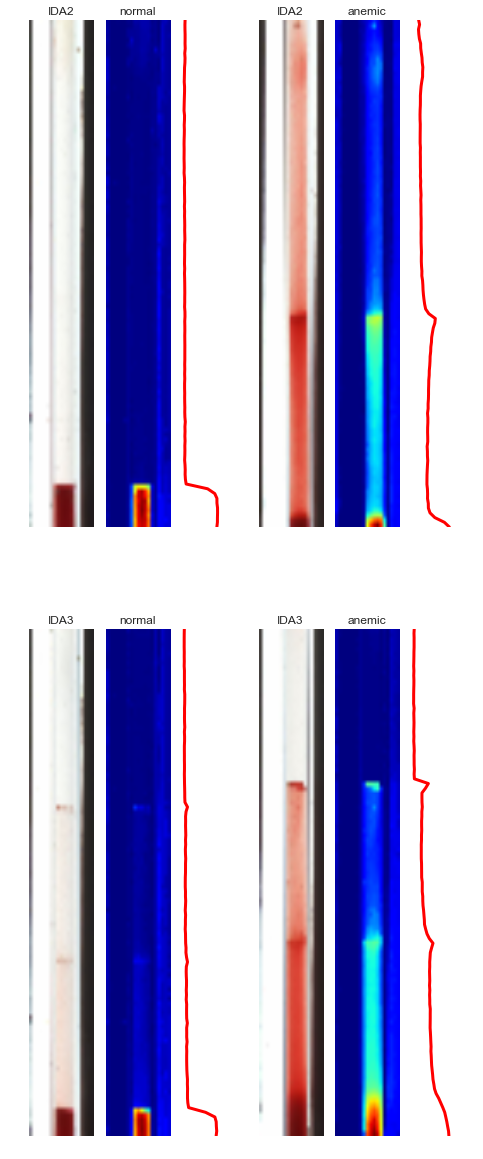

In [28]:
from blurd.util import extract_redness
figure(figsize=(8,20))
gs = GridSpec(2,6)
centrifugation_time = 4
itubes = [8,0,0,0]
i = 0
for iassay,assay in enumerate(["IDA2", "IDA3"]): # IDA3
    for idiagnosis, diagnosis in enumerate(['normal', 'anemic']):
        isdf = sdf[(sdf.ida==assay)&(sdf.run_time==centrifugation_time)&(sdf.blood_type==diagnosis)]
        shift = isdf['shift'].iloc[itubes[i]]+3
        this_idx = slice(shift, 120)
        image = isdf.image.iloc[itubes[i]][this_idx]
        redness = extract_redness(image)
        
        ax = subplot(gs[iassay, idiagnosis*3])
        imshow(image); grid('off'); axis('off')
        title(assay)
        ax.invert_yaxis()
        ax.axis('tight')
        
        ax = subplot(gs[iassay, idiagnosis*3+1])
        imshow(redness, cmap='jet'); grid('off'); axis('off')
        title(diagnosis)
        ax.invert_yaxis()
        ax.axis('tight')
        
        ax = subplot(gs[iassay, idiagnosis*3+2])
        plot(np.mean(redness,1)[::-1], range(this_idx.start, this_idx.stop), color='r', linewidth=3)
        axis('off'); axis('tight')
        xlim(0,1.1)
        ax.invert_yaxis()
        i += 1

In [ ]:
sdf.ida=="IDA3"

In [17]:
data_name = "HCT"
isdf = sdf[(sdf.ida=="IDA3")&(sdf.run_time==2)&(sdf.blood_type=="normal")]
idx = np.argsort(isdf[data_name].values)
data = np.vstack(isdf.data.values)

([], <a list of 0 Text xticklabel objects>)

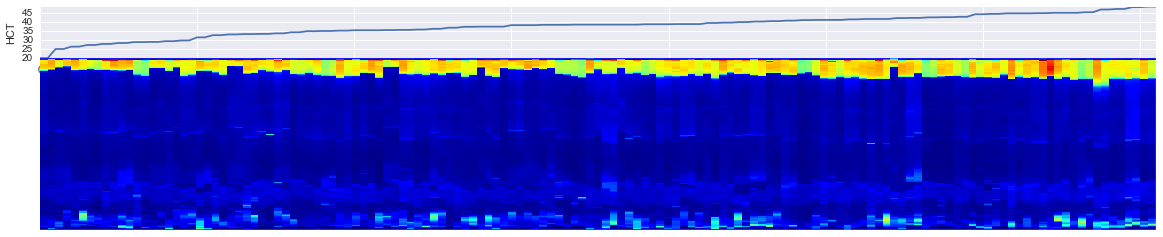

In [19]:
figure(figsize=(20,4))
gs = GridSpec(2,1, height_ratios=[3,10], hspace=0)
subplot(gs[0])
plot(isdf[data_name].values[idx])
axis('tight')
ylabel(data_name)
subplot(gs[1])
imshow(data[idx,:].T, cmap='jet', interpolation='none')
grid('off'); axis('tight')
yticks([]); xticks([])